# Make your own regression model


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
excel_file = 'table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls'
df = pd.read_excel(excel_file, index_col=0)
df.index.names= ['City']
df.columns = ['Population','Violent_crime','Murder' ,'Rape_revised','Rape','Robbery','Aggravated_assault','Property_crime','Burglary','Larceny_theft','Motor_vehicle_theft','Arson3']
df = df.iloc[4:]
df.drop(df.tail(3).index,inplace=True)
df.head()

,Population,Violent_crime,Murder,Rape_revised,Rape,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3
City,,,,,,,,,,,,
Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [22]:
propertycrime = df[['Population','Murder','Robbery','Property_crime']]
propertycrime.head()

,Population,Murder,Robbery,Property_crime
City,,,,
Adams Village,1861,0,0,12
Addison Town and Village,2577,0,0,24
Akron Village,2846,0,0,16
Albany,97956,8,227,4090
Albion Village,6388,0,4,223


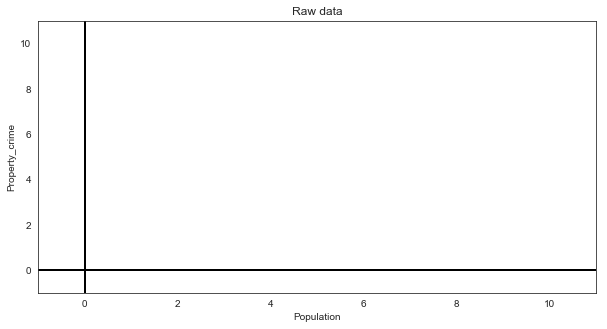

In [24]:
plt.figure(figsize = (10,5))

# Setting the default plot aesthetics to be prettier.
sns.set_style("white")

t = sns.regplot(
    'Population',
    'Property_crime',
    propertycrime,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

C:\Users\femis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\femis\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\femis\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

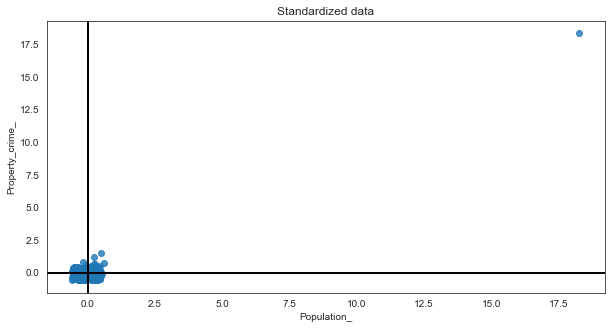

In [28]:
#Standardizing the data

plt.figure(figsize = (10,5))

propertycrime['Population_'] = (propertycrime['Population'] - propertycrime['Population'].mean()) / propertycrime['Population'].std()
propertycrime['Murder_'] = (propertycrime['Murder'] - propertycrime['Murder'].mean()) / propertycrime['Murder'].std()
propertycrime['Robbery_'] = (propertycrime['Robbery'] - propertycrime['Robbery'].mean()) / propertycrime['Robbery'].std()
propertycrime['Property_crime_'] = (propertycrime['Property_crime'] - propertycrime['Property_crime'].mean()) / propertycrime['Property_crime'].std()

t = sns.regplot(
    'Population_',
    'Property_crime_',
    propertycrime,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

In [29]:
display(propertycrime.head())

,Population,Murder,Robbery,Property_crime,Population_,Property_crime_,Murder_,Robbery_
City,,,,,,,,
Adams Village,1861,0,0,12,-0.085,-0.102,-0.086,-0.071
Addison Town and Village,2577,0,0,24,-0.083,-0.100,-0.086,-0.071
Akron Village,2846,0,0,16,-0.083,-0.101,-0.086,-0.071
Albany,97956,8,227,4090,0.129,0.430,0.352,0.149
Albion Village,6388,0,4,223,-0.075,-0.074,-0.086,-0.067


# Extraordinary Power of Explanatory Power

ValueError: Expected 2D array, got 1D array instead:
array=[-0.08556162 -0.08556162 -0.08556162  0.35150913 -0.08556162 -0.08556162
 -0.08556162 -0.03092778 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.03092778 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162  0.07833991 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.03092778 -0.03092778 -0.08556162 -0.08556162  2.48222903
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.03092778 -0.08556162 -0.08556162 -0.08556162 -0.03092778 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.03092778 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.03092778 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.03092778 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.03092778 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162  0.46077681 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.03092778 -0.08556162 -0.08556162 -0.03092778
 -0.08556162 -0.08556162 -0.03092778 -0.08556162 -0.08556162 -0.03092778
 -0.08556162 -0.03092778 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.03092778 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162  0.02370606 -0.08556162 -0.08556162  0.1876076
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 18.21677604 -0.08556162  0.07833991 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.03092778 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.03092778 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.03092778 -0.08556162 -0.08556162  0.29687528 -0.03092778
 -0.08556162 -0.08556162 -0.08556162  0.02370606 -0.08556162 -0.08556162
 -0.08556162 -0.08556162  2.20905982 -0.03092778  0.13297375 -0.08556162
  0.02370606 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.03092778
 -0.03092778 -0.08556162 -0.08556162  0.35150913 -0.08556162 -0.08556162
 -0.03092778 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.03092778 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162  0.02370606
 -0.08556162 -0.08556162 -0.08556162 -0.08556162  1.0617491  -0.08556162
 -0.08556162 -0.08556162 -0.03092778 -0.03092778 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.08556162  0.29687528 -0.08556162 -0.03092778
 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.03092778 -0.08556162 -0.08556162 -0.08556162 -0.08556162
 -0.08556162 -0.08556162 -0.03092778 -0.08556162 -0.03092778 -0.08556162
 -0.08556162 -0.08556162 -0.08556162 -0.08556162  0.24224144 -0.08556162].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

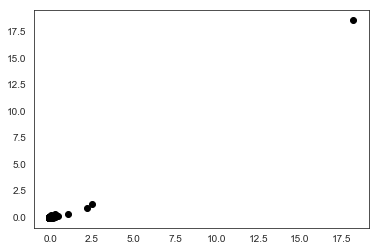

In [50]:

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = propertycrime['Property_crime_'].values.reshape(-1, 1)
X = propertycrime[['Population_','Murder_','Robbery_']]
regr.fit(X, Y)

# Plot outputs
plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()



In [51]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.71606438  0.54599799 -0.25896361]]

Intercept: 
 [9.8976232e-18]

R-squared:
0.9983708205913117


The outcome Property crime is predicted by the features Population, Murder, and Robbery explains 99.8% of the variance in Property crime.

Property crime have the highest per-unit increase when based on Population (0.716).

# Linear relationship
 
  features in a regression need to have a linear relationship with the outcome. If the relationship is non-linear, the regression model will try to find any hint of a linear relationship, and only explain that – with predictable consequences for the validity of the model.

Sometimes this can be fixed by applying a non-linear transformation function to a feature.

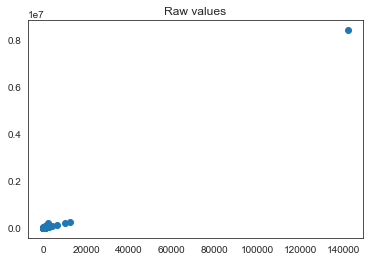

In [40]:
import math
import warnings
import statsmodels.formula.api as smf
from IPython.display import display

# Sample data.
outcome = propertycrime['Property_crime']
feature = propertycrime['Population']

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()



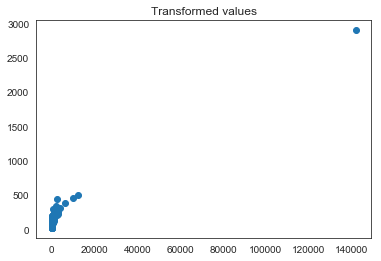

In [41]:
# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

# Multivariate normality

The error from the model (calculated by subtracting the model-predicted values from the real outcome values) should be normally distributed.

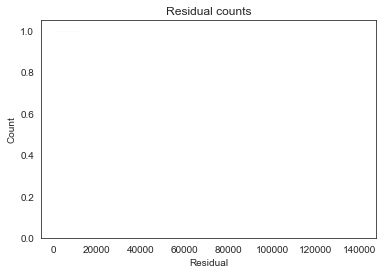

In [42]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = propertycrime['Property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# Homoscedasticity

The distribution of your error terms (its "scedasticity"), should be consistent for all predicted values, or homoscedastic.

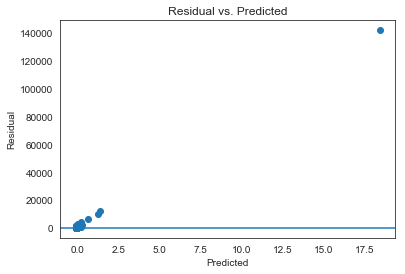

In [43]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()